In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from scipy.stats import boxcox
import pylab

In [134]:
import keras
from keras import layers,Sequential
from keras.layers import Dense,Dropout



In [2]:
df=pd.read_csv("F:\download from c to e\project_cv_build\Car details v3.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
#cheaking null value in which columns
li=[]
for i in df.columns:
    if df[i].isna().sum()>0:
        li.append(i)
print(li)

['mileage', 'engine', 'max_power', 'torque', 'seats']


In [8]:
#dropping null value
df.dropna(inplace=True)

In [9]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [10]:
df["mil"]=df.mileage.str.split(".")
df["en"]=df.engine.str.split(" ")
df["mp"]=df.max_power.str.split(" ")
df["mileage"]=df.mil.apply(lambda x:x[0]).astype("int")
df["engine"]=df.en.apply(lambda x:x[0]).astype("int")
df["max_power"]=df.mp.apply(lambda x:x[0]).astype("float")

In [11]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage            int32
engine             int32
max_power        float64
torque            object
seats            float64
mil               object
en                object
mp                object
dtype: object

In [12]:
#dropping unnessery columns
cl=["mil","en","mp","torque"]
df.drop(cl,axis=1,inplace=True)

In [13]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88.20,5.0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.0,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.0,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.0,2360457.0
mileage,7906.0,18.981027,4.064364,0.0,16.00,19.0,22.0,42.0
engine,7906.0,1458.708829,503.893057,624.0,1197.00,1248.0,1582.0,3604.0
max_power,7906.0,91.587374,35.747216,32.8,68.05,82.0,102.0,400.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.0,14.0


# Different Lables for each columns:

In [15]:

lis=["fuel","seller_type","transmission","owner"]
for i in lis:
    print("****************")
    print(i)
    
    print(df[i].value_counts())
    print("******************")

****************
fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64
******************
****************
seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64
******************
****************
transmission
Manual       6865
Automatic    1041
Name: transmission, dtype: int64
******************
****************
owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64
******************


# Data Visualization

catagorical columns=["fuel","seller_type","transmission","owner"]




numerical columns=year,selling_price,km_driven,mileage,engine,max_power,seats

# Distribution plotting

<AxesSubplot:xlabel='max_power', ylabel='Count'>

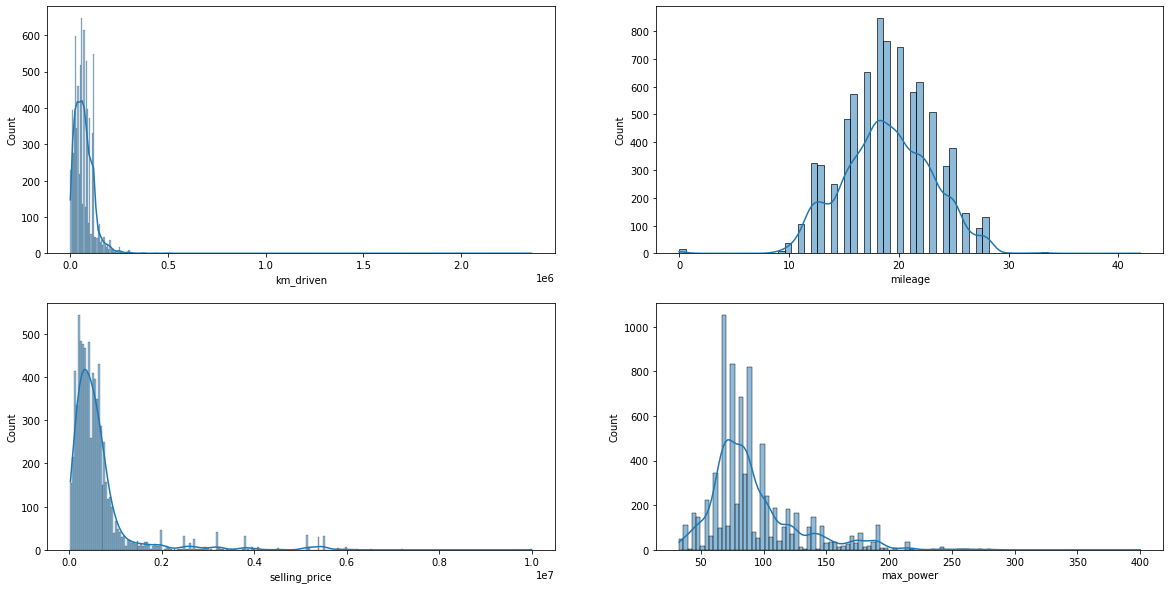

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(x="km_driven",data=df,kde=True)
plt.subplot(2,2,2)
sns.histplot(x="mileage",data=df,kde=True)
plt.subplot(2,2,3)
sns.histplot(x="selling_price",data=df,kde=True)
plt.subplot(2,2,4)
sns.histplot(x="max_power",data=df,kde=True)



<AxesSubplot:xlabel='max_power', ylabel='Proportion'>

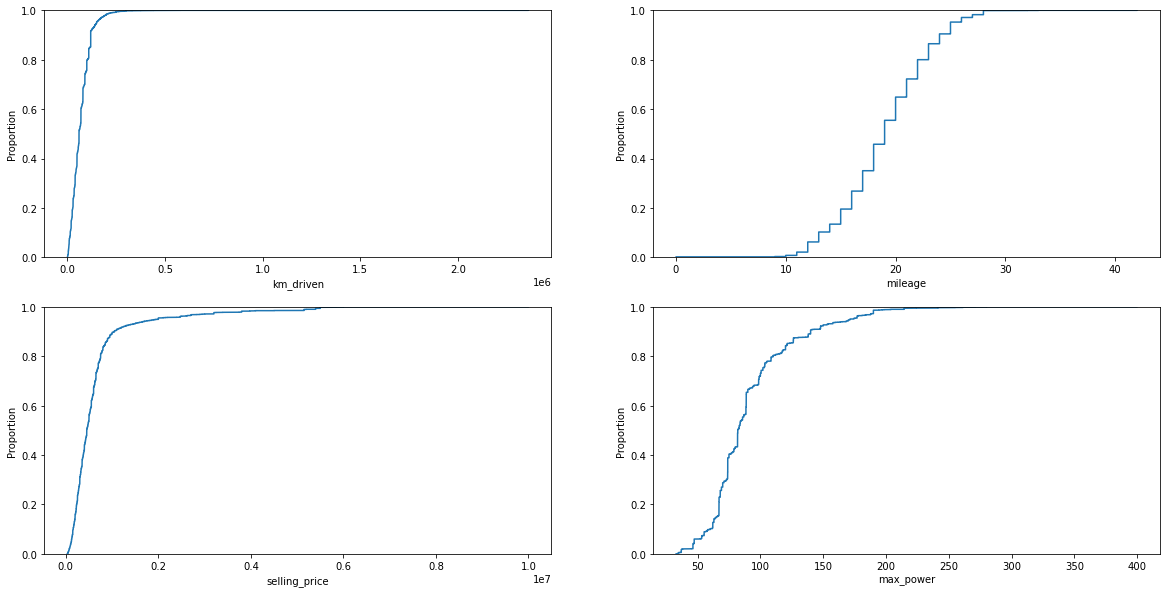

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.ecdfplot(x="km_driven",data=df)
plt.subplot(2,2,2)
sns.ecdfplot(x="mileage",data=df)
plt.subplot(2,2,3)
sns.ecdfplot(x="selling_price",data=df)
plt.subplot(2,2,4)
sns.ecdfplot(x="max_power",data=df)

# Catagorical data plotting

<AxesSubplot:xlabel='selling_price', ylabel='seller_type'>

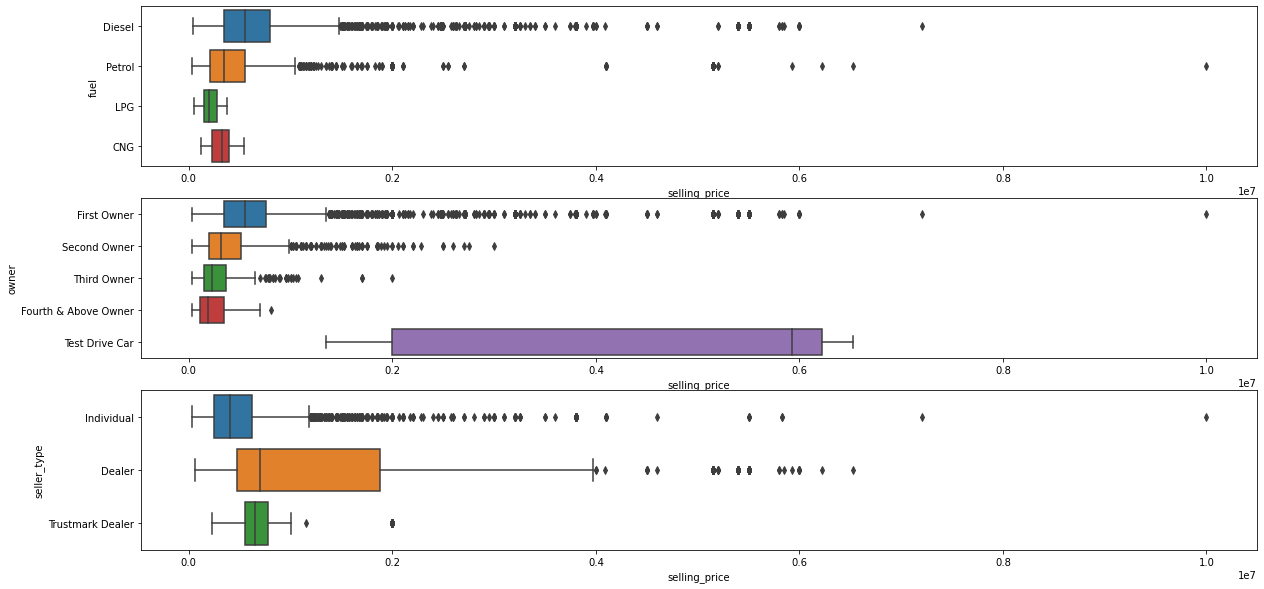

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
sns.boxplot(x="selling_price",y="fuel",data=df)
plt.subplot(3,1,2)
sns.boxplot(x="selling_price",y="owner",data=df)
plt.subplot(3,1,3)
sns.boxplot(x="selling_price",y="seller_type",data=df)


<AxesSubplot:xlabel='owner', ylabel='mileage'>

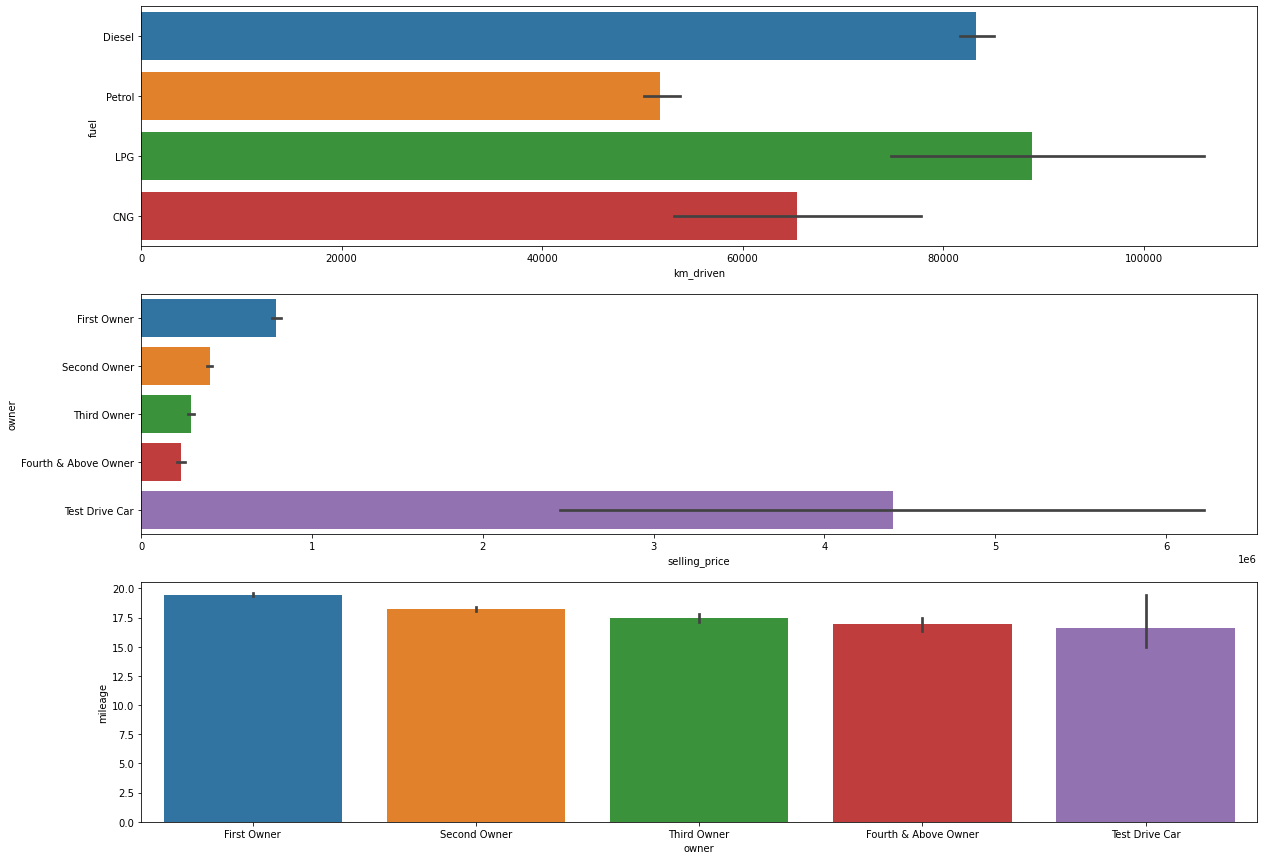

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.barplot(x="km_driven",y="fuel",data=df)
plt.subplot(3,1,2)
sns.barplot(x="selling_price",y="owner",data=df)
plt.subplot(3,1,3)
sns.barplot(x="owner",y="mileage",data=df)

# pieplot

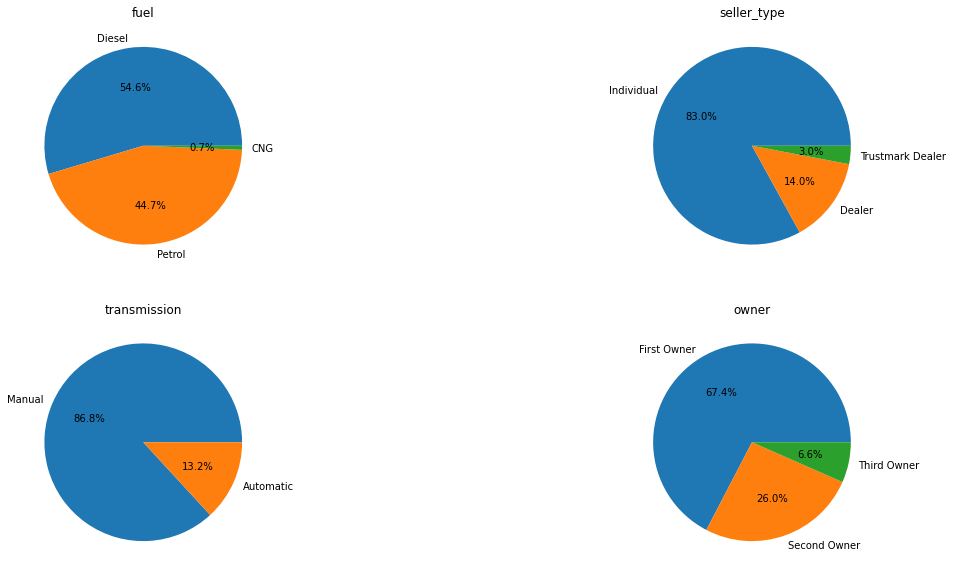

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("fuel")
plt.pie(df.fuel.value_counts()[:3],labels=df.fuel.value_counts().keys()[:3],autopct="%.1f%%")
plt.subplot(2,2,2)
plt.title("seller_type")
plt.pie(df.seller_type.value_counts()[:3],labels=df.seller_type.value_counts().keys()[:3],autopct="%.1f%%")
plt.subplot(2,2,3)
plt.title("transmission")
plt.pie(df.transmission.value_counts()[:3],labels=df.transmission.value_counts().keys()[:3],autopct="%.1f%%")
plt.subplot(2,2,4)
plt.title("owner")
plt.pie(df.owner.value_counts()[:3],labels=df.owner.value_counts().keys()[:3],autopct="%.1f%%")

plt.show()

<AxesSubplot:xlabel='km_driven', ylabel='owner'>

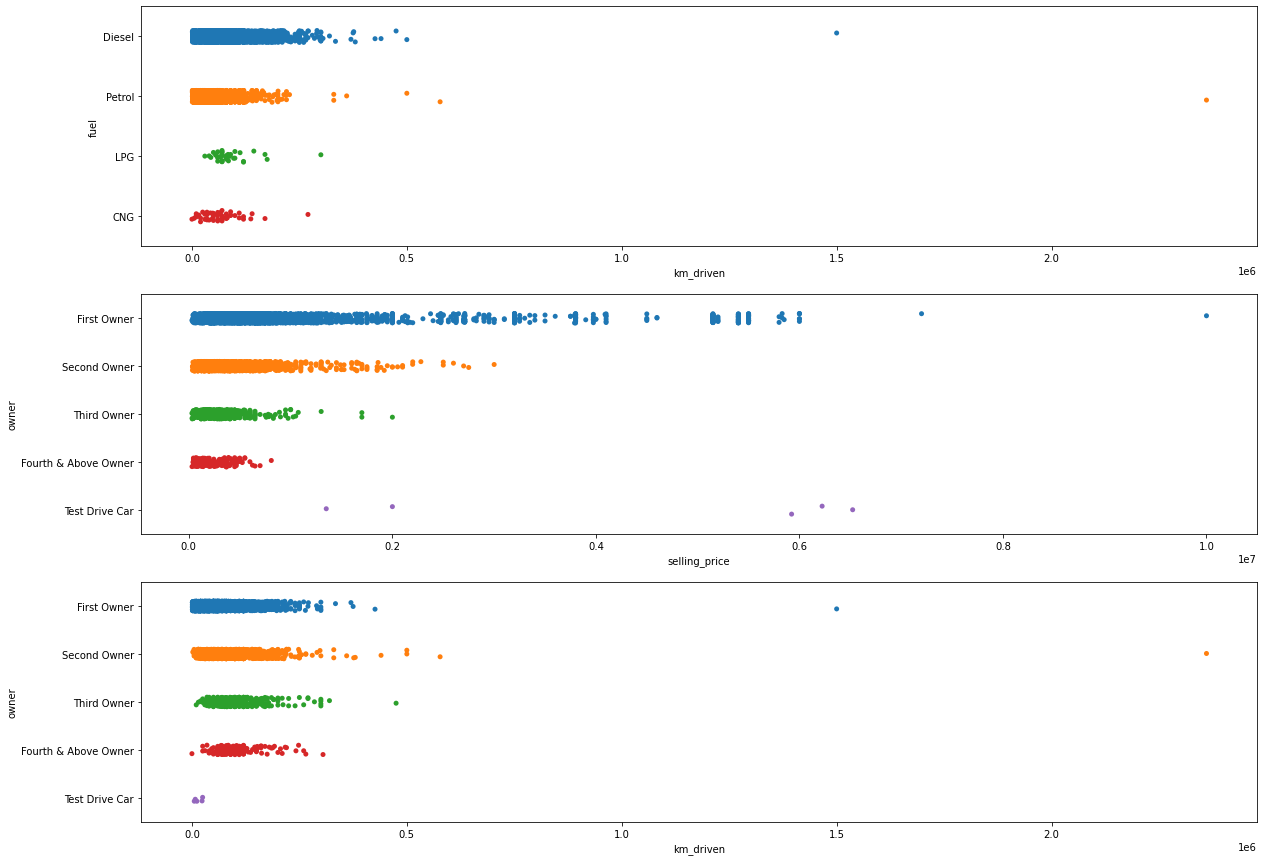

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.stripplot(x="km_driven",y="fuel",data=df)
plt.subplot(3,1,2)
sns.stripplot(x="selling_price",y="owner",data=df)
plt.subplot(3,1,3)
sns.stripplot(y="owner",x="km_driven",data=df)

# One-Hot Encoding certain categorical variables which were not ordinal for better representation in the learning model

In [22]:
train=pd.get_dummies(df,columns=["fuel","seller_type","transmission","owner"])

In [23]:
train.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23,1248,74.00,5.0,0,1,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21,1498,103.52,5.0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17,1497,78.00,5.0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23,1396,90.00,5.0,0,1,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16,1298,88.20,5.0,0,0,...,0,1,0,0,1,1,0,0,0,0


# Data cleaning

# dropping "name " column

In [24]:
train.drop(["name"],axis=1,inplace=True)
train.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23,1248,74.00,5.0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
1,2014,370000,120000,21,1498,103.52,5.0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,2006,158000,140000,17,1497,78.00,5.0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2010,225000,127000,23,1396,90.00,5.0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,130000,120000,16,1298,88.20,5.0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


# Outlier Handeling


# removing outlier of "km_driven" column using isolation forest

In [25]:
model=IsolationForest(n_estimators=100,max_samples='auto')

model.fit(np.array(train.km_driven).reshape(-1,1))
train['scores'] = model.decision_function(np.array(train.km_driven).reshape(-1,1))

train['anomaly_score'] = model.predict(np.array(train.km_driven).reshape(-1,1))
train.drop(train[train['anomaly_score']==-1].index,inplace=True)



        


# removing outlier of "selling_price" using z score

In [26]:
train["z"]=np.abs(train.selling_price-train.selling_price.mean())/train.selling_price.std()
train.drop(train[train["z"]>3].index,inplace=True)

In [27]:
train.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,scores,anomaly_score,z
1,2014,370000,120000,21,1498,103.52,5.0,0,1,0,...,0,1,0,0,1,0,0,0.071928,1,0.315397
4,2007,130000,120000,16,1298,88.20,5.0,0,0,0,...,0,1,1,0,0,0,0,0.071928,1,0.666407
5,2017,440000,45000,20,1197,81.86,5.0,0,0,0,...,0,1,1,0,0,0,0,0.030300,1,0.213020
8,2011,350000,90000,23,1364,67.10,5.0,0,1,0,...,0,1,1,0,0,0,0,0.057151,1,0.344648
10,2014,500000,68000,19,1461,108.45,5.0,0,1,0,...,0,1,0,0,1,0,0,0.036880,1,0.125267


# outlier removing of "mileage" column using IQR method

In [28]:
iqr=train.mileage.quantile(.75)-train.mileage.quantile(.25)
lower=train.mileage.quantile(.25)-(1.5*iqr)
upper=train.mileage.quantile(.75)+(1.5*iqr)
train.drop(train[(train.mileage>upper)|(train.mileage<lower)].index,inplace=True)


# Feature Transformation

In [331]:
df.skew()

year             -0.994973
selling_price     4.156864
km_driven        11.342853
mileage          -0.124457
engine            1.135359
max_power         1.639673
seats             1.971052
dtype: float64

It is quite evident that some of the continuous variables are **skewed**,i.e, some are Left-skewed and some are Right-skewed distributions in the train set.



1.**BoxCox Transformations** for Right-tailed distributions


2.**log transformatons** for log_normal distribution

**before transformation QQ plot**

((array([-3.75212866, -3.52367468, -3.39809553, ...,  3.39809553,
          3.52367468,  3.75212866]),
  array([ 32.8,  32.8,  34.2, ..., 280. , 282. , 400. ])),
 (33.26231334888997, 91.58737351378699, 0.9301342440383031))

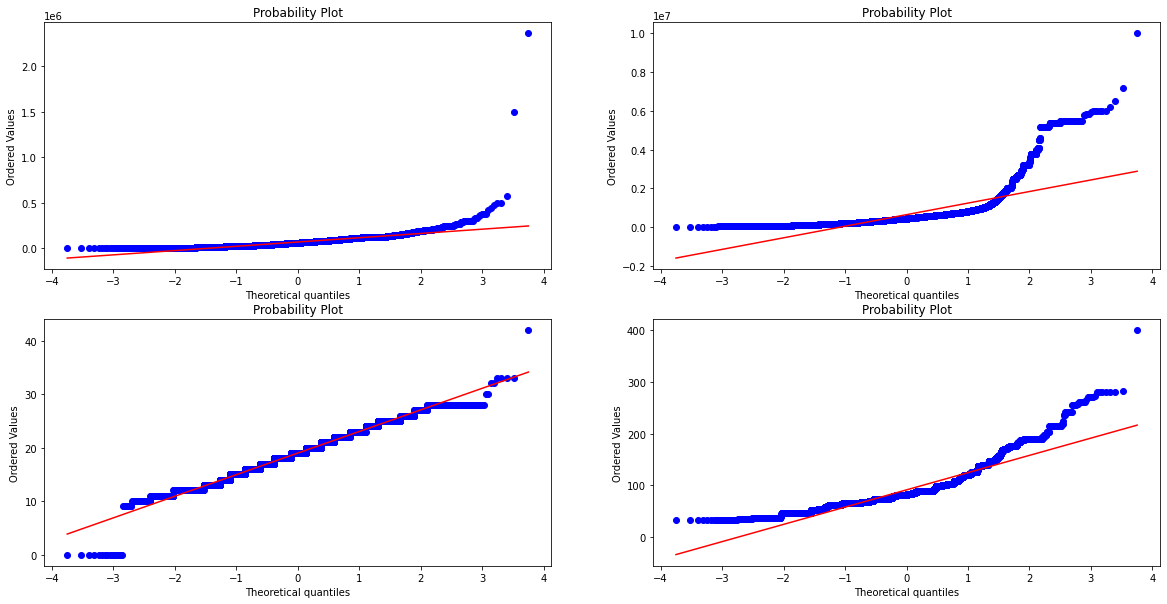

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("km_driven")
stats.probplot(df.km_driven, dist="norm", plot=pylab)
plt.subplot(2,2,2)
plt.title("selling_price")
stats.probplot((df.selling_price), dist="norm", plot=pylab)
plt.subplot(2,2,3)
plt.title("mileage")
stats.probplot(df.mileage, dist="norm", plot=pylab)

plt.subplot(2,2,4)
plt.title("engine")
stats.probplot((df.max_power), dist="norm", plot=pylab)



**after transformation QQ plot**

((array([-3.75212866, -3.52367468, -3.39809553, ...,  3.39809553,
          3.52367468,  3.75212866]),
  array([2.13999435, 2.13999435, 2.15418837, ..., 2.67661479, 2.67787126,
         2.7363144 ])),
 (0.0873378737225227, 2.4199643027518247, 0.98988112163004))

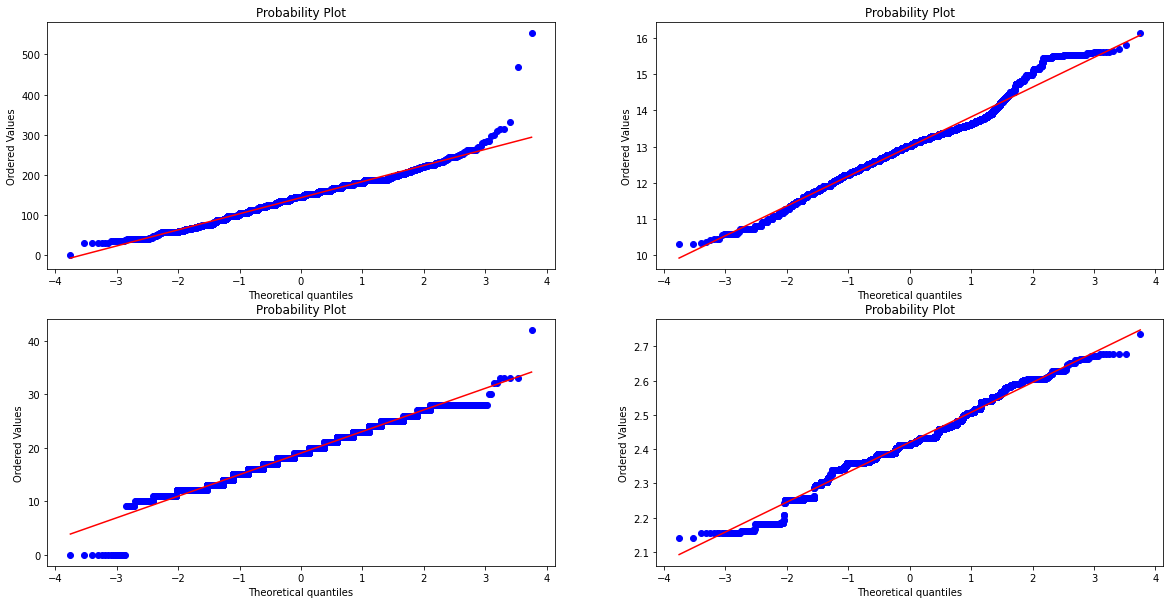

In [332]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("km_driven")
stats.probplot(boxcox(df.km_driven)[0], dist="norm", plot=pylab)
plt.subplot(2,2,2)
plt.title("selling_price")
stats.probplot(np.log(df.selling_price), dist="norm", plot=pylab)
plt.subplot(2,2,3)
plt.title("mileage")
stats.probplot(df.mileage, dist="norm", plot=pylab)

plt.subplot(2,2,4)
plt.title("engine")
stats.probplot(boxcox(df.max_power)[0], dist="norm", plot=pylab)

In [35]:
train["selling_price_tr"]=np.log(train.selling_price)
train["max_power_tr"]=boxcox(train.max_power)[0]

In [38]:
train.drop(["selling_price","max_power","scores","anomaly_score","z"],axis=1,inplace=True)

In [40]:
output=train["selling_price_tr"]
input=train.drop(["selling_price_tr"],axis=1)

In [42]:
input

,year,km_driven,mileage,engine,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,max_power_tr
1,2014,120000,21,1498,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,3.554144
4,2007,120000,16,1298,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,3.461687
5,2017,45000,20,1197,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,3.418010
8,2011,90000,23,1364,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,3.299661
10,2014,68000,19,1461,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,3.580669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,18,1197,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,3.425075
8124,2007,119000,16,1493,5.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,3.588730
8125,2009,120000,19,1248,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,3.357473
8126,2013,25000,23,1396,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,3.325084


# Splitting data for training in ML/DL Model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(input ,output, test_size=0.20, random_state=42)

In [46]:
X_train

,year,km_driven,mileage,engine,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,max_power_tr
1059,2016,54000,18,1199,5.0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,3.464981
1839,2008,120000,12,2179,8.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,3.637857
2233,2006,40000,16,796,4.0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2.927899
1486,2018,60000,22,1396,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,3.465374
149,2010,72200,10,2497,5.0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,3.761516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,2015,120000,21,1461,7.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,3.431766
6905,2015,120000,24,1120,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,3.333578
6949,2013,110000,15,2523,7.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,3.252793
7169,2017,30000,23,999,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,3.298762


# Scalling dataset using standard scaler

transformed data=z = (x - u) / s


u=mean of data


s=standered deviation 

In [62]:
x_train=StandardScaler().fit_transform(X_train)
x_test=StandardScaler().fit_transform(X_test)
crossvaldata=StandardScaler().fit_transform(input)

# fitting data 

In [57]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [59]:
gb.score(x_train,y_train)

0.904700223318956

In [63]:
print(f"train Score:{gb.score(x_train,y_train)}")
print(f"test Score:{gb.score(x_test,y_test)}")
print(f"five fold cross val score::{cross_val_score(gb,crossvaldata,output,cv=5)}")

train Score:0.904700223318956
test Score:0.8874549223682833
five fold cross val score::[0.8881601  0.89456689 0.89180799 0.89861997 0.89273278]


**cross val score showes the model is well fitted**

# Deep_learning_model

In [324]:
model=Sequential()
model.add(Dense(40,input_shape=(4878, 20),activation="relu"))


model.add(Dense(40,activation="relu"))
#model.add(Dense(25,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(20,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))


# # 

In [325]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 4878, 40)          840       
_________________________________________________________________
dense_136 (Dense)            (None, 4878, 40)          1640      
_________________________________________________________________
dropout_31 (Dropout)         (None, 4878, 40)          0         
_________________________________________________________________
dense_137 (Dense)            (None, 4878, 20)          820       
_________________________________________________________________
dropout_32 (Dropout)         (None, 4878, 20)          0         
_________________________________________________________________
dense_138 (Dense)            (None, 4878, 5)           105       
_________________________________________________________________
dense_139 (Dense)            (None, 4878, 1)         

In [326]:
model.compile(loss="mse",optimizer="Adam",metrics=['mae'])

In [327]:
hist=model.fit(x_train,y_train,epochs=100,validation_split=.15)

Epoch 1/100
130/130 [==============================] - 0s 3ms/step - loss: 83.6967 - mae: 8.2006 - val_loss: 11.0846 - val_mae: 3.0022
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 30.3770 - mae: 4.3532 - val_loss: 4.6637 - val_mae: 1.9300
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 22.6158 - mae: 3.8741 - val_loss: 3.8135 - val_mae: 1.7515
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 18.8340 - mae: 3.5182 - val_loss: 3.2840 - val_mae: 1.6471
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 16.8474 - mae: 3.2989 - val_loss: 4.7256 - val_mae: 2.0700
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 14.2338 - mae: 3.0341 - val_loss: 4.4511 - val_mae: 2.0022
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 13.5428 - mae: 2.9303 - val_loss: 7.8850 - val_mae: 2.7245
Epoch 8/100
130/130 [==============================] - 0s 2ms

In [328]:
hi2=model.evaluate(x_test,y_test)

39/39 [==============================] - 0s 2ms/step - loss: 0.8950 - mae: 0.8901


Text(0, 0.5, 'mse')

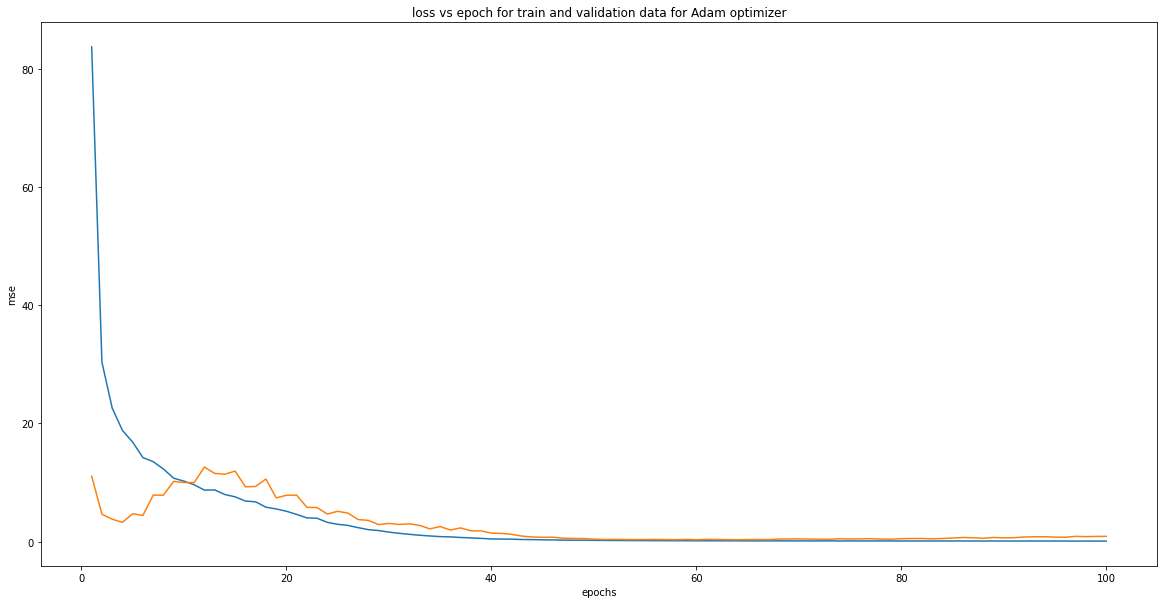

In [330]:
epoch=np.arange(1,101,1)
plt.figure(figsize=(20,10))

plt.plot(epoch,hist.history["loss"])
plt.plot(epoch,hist.history["val_loss"])
plt.title("loss vs epoch for train and validation data for Adam optimizer")
plt.xlabel("epochs")
plt.ylabel("mse")